# Outlier Detection Techniques
Outlier detection and treatment are crucial steps in the data preprocessing stage of machine learning to ensure model accuracy and reliability.

### Outlier Detection Techniques

1. **Statistical Methods:**
   - **Z-Score:** Measures how many standard deviations a data point is from the mean. A common threshold is 3 or -3.
   - **Modified Z-Score:** Uses the median and median absolute deviation for robust detection, especially useful for skewed distributions.
   - **IQR (Interquartile Range):** Points beyond \(1.5 \times IQR\) from the first and third quartiles are considered outliers.

2. **Visualization Techniques:**
   - **Box Plot:** Visual representation using quartiles to identify outliers as points outside the whiskers.
   - **Scatter Plot:** Visual inspection can reveal outliers, especially in two-dimensional data.
   - **Histogram:** Shows the distribution of data and highlights unusually distant values.

3. **Model-Based Methods:**
   - **Isolation Forest:** Identifies anomalies by isolating observations, working well with high-dimensional data.
   - **One-Class SVM:** Classifies data into normal or outlier by finding a boundary that separates the majority of data points.
   - **Autoencoders:** Neural networks that reconstruct input data; high reconstruction error may indicate outliers.

4. **Distance-Based Methods:**
   - **k-Nearest Neighbors (k-NN):** Points with a large average distance to their nearest neighbors are considered outliers.
   - **Local Outlier Factor (LOF):** Measures the local density deviation of a data point relative to its neighbors.

5. **Clustering-Based Methods:**
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Identifies outliers as points that do not fit well into any cluster.
   - **K-Means:** Points that are far from any cluster centroid can be considered outliers.


# Statistical Methods
## 1.  Z-Score

In [17]:
import numpy as np
import pandas as pd

data = pd.DataFrame({'values': np.random.normal(0,1,1000),
                    'Numbers': [x for x in range(1000)]})
# Calculate z score
data['z_score'] = (data['values'] - data['values'].mean())/data['values'].std()
outliers = data[np.abs(data['z_score']) > 2.5]
print(outliers)


       values  Numbers   z_score
53  -2.564520       53 -2.588161
67  -3.105904       67 -3.127240
90   2.870520       90  2.823737
162 -2.869455      162 -2.891798
170 -2.657589      170 -2.680834
379  2.658318      379  2.612439
430  3.151296      430  3.103318
438  2.616071      438  2.570372
707  2.927549      707  2.880524
731  2.666938      731  2.621023
777  2.595703      777  2.550091
840  3.104027      840  3.056250
914  2.619865      914  2.574150


# IQR (Interquartile Range)

In [28]:
Q1 = data['values'].quantile(0.25)
Q3 = data['values'].quantile(0.75)

IQR = Q3 - Q1

# Define the outlier criteria
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 - 0.5 * IQR
outliers = data[(data['values'] < lower_bound) | (data['values'] > upper_bound)]
print(outliers)

       values  Numbers   z_score
2   -1.329154        2 -1.358056
3    0.434679        3  0.398267
5    0.602661        5  0.565535
7    2.182073        7  2.138222
9    0.095496        9  0.060529
..        ...      ...       ...
992  1.960715      992  1.917806
993  1.225834      993  1.186054
995 -1.704653      995 -1.731955
998  1.493921      998  1.453000
999  0.153845      999  0.118630

[613 rows x 3 columns]


# Visualiztion Technqiues

## Bounding Box

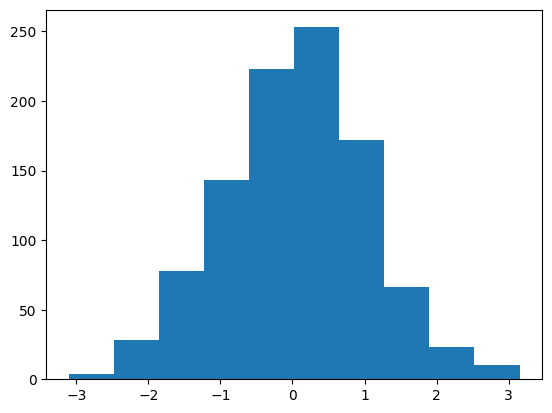

In [43]:
import matplotlib.pyplot as plt
plt.hist(data['values'])
plt.show()

# Model Based methods

In [46]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01)

data['outlier'] = iso.fit_predict(data[['values']])

outliers = data[data['outlier'] == -1]
print(outliers)

       values  Numbers   z_score  outlier
53  -2.564520       53 -2.588161       -1
67  -3.105904       67 -3.127240       -1
90   2.870520       90  2.823737       -1
162 -2.869455      162 -2.891798       -1
170 -2.657589      170 -2.680834       -1
430  3.151296      430  3.103318       -1
672 -2.431755      672 -2.455962       -1
707  2.927549      707  2.880524       -1
840  3.104027      840  3.056250       -1


In [50]:
# Distance Based methods

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
data['outlier'] = lof.fit_predict(data[['values']])

outliers = data[data['outlier'] == -1]

print(outliers)

       values  Numbers   z_score  outlier
53  -2.564520       53 -2.588161       -1
67  -3.105904       67 -3.127240       -1
90   2.870520       90  2.823737       -1
162 -2.869455      162 -2.891798       -1
170 -2.657589      170 -2.680834       -1
379  2.658318      379  2.612439       -1
430  3.151296      430  3.103318       -1
438  2.616071      438  2.570372       -1
446 -2.380504      446 -2.404928       -1
458 -2.341317      458 -2.365908       -1
523  2.530355      523  2.485021       -1
666 -2.340829      666 -2.365423       -1
672 -2.431755      672 -2.455962       -1
674  2.440515      674  2.395564       -1
707  2.927549      707  2.880524       -1
731  2.666938      731  2.621023       -1
763  2.401186      763  2.356402       -1
777  2.595703      777  2.550091       -1
840  3.104027      840  3.056250       -1
914  2.619865      914  2.574150       -1
